In [1]:
%%capture
!pip install langchain langgraph langchain_core langchain_community langchain-google-genai

In [51]:
import os
os.environ['TAVILY_API_KEY']=tavily_api_key
TAVILY_API_KEY=os.getenv("TAVILY_API_KEY")
os.environ["ELEVEN_LABS_API_KEY"] = elevenlabs_api_key




os.environ["GOOGLE_API_KEY"]=google_api_key



from langchain_google_genai import ChatGoogleGenerativeAI

# model_name="gemini-1.5-flash-latest"
model_name="gemini-2.5-flash"

llm=ChatGoogleGenerativeAI(
    model=model_name,
    temperature=0.2
)


In [ ]:
!pip install -q  tavily-python

In [26]:
# To install: pip install tavily-python
from tavily import TavilyClient



{'results': [{'url': 'https://www.uipath.com/blog/ai/why-ai-agents-need-idp', 'raw_content': "UiPath Blog\n\n[UiPath Blog](https://www.uipath.com/blog)\n\n[Automation](https://www.uipath.com/blog/automation)\n\n[Digital Transformation](https://www.uipath.com/blog/digital-transformation)\n\n[AI](https://www.uipath.com/blog/ai)\n\n[Industry Solutions](https://www.uipath.com/blog/industry-solutions)\n\n[Product](https://www.uipath.com/blog/product-and-updates)\n\n[RPA](https://www.uipath.com/blog/rpa)\n\nMore\n\n[Community Blog](https://www.uipath.com/community-blog)\n[Resource Center](https://www.uipath.com/resources/all)\n[Newsroom](https://www.uipath.com/newsroom)\n\nSubscribe\n\n[Blog](/blog)\n[Artificial Intelligence](/blog/ai)\n\nWhy AI agents need intelligent document processing\n\n# Why AI agents need intelligent document processing\n\nby\n\n[Mark Geene](/blog/mark-geene/)\n\n•\nAugust 6, 2025\n\nDocuments underlie every business process. Traditionally, businesses fully depended o

In [43]:
def Blog_scrap_tool(url:str):
    client = TavilyClient(TAVILY_API_KEY)
    response = client.extract(
        urls=[f"{url}"]
    )
    return response['results'][0]['raw_content']





In [49]:
from langchain_core.prompts import ChatPromptTemplate

from langchain_core.output_parsers import StrOutputParser


template_of_summariztion_blog="""
You are a skilled content writer and podcast script creator.
Your task is to take the provided blog content and:
1. Summarize the main ideas and insights.
2. Rewrite it as an engaging, conversational script for audio narration.
3. Keep the script concise (≤ 2000 characters), while maintaining clarity and flow.
4. Remove any unnecessary text like ads, links, author bios, or repetitive statements.
5. Use a friendly, listener-oriented tone with smooth transitions.
6. Avoid technical jargon unless essential, and explain briefly if needed.
7. Output the final script only, without extra commentary or formatting.

Here is the blog content:
{blog_post}


"""
summ_prompt=ChatPromptTemplate.from_template(template_of_summariztion_blog)

chainofsumm_blog=summ_prompt|llm|StrOutputParser()


In [47]:
blog=Blog_scrap_tool(url="https://www.uipath.com/blog/ai/why-ai-agents-need-idp")

In [ ]:
blog


In [50]:
res=chainofsumm_blog.invoke({"blog_post":blog})
print(res)

Hey there, listeners! Ever wonder how AI agents handle all those important business documents? Documents are the backbone of every company, and while AI agents are great at automating tasks, they often hit a wall with complex, high-volume paperwork.

That's where Intelligent Document Processing, or IDP, becomes essential. Think of IDP as a specialized, high-precision tool in an AI agent's toolbox. While powerful Large Language Models, or LLMs, excel at creative tasks, they can struggle with consistency and accuracy when extracting specific, structured data from thousands of complex documents. They might even "hallucinate" incorrect information!

IDP solutions bridge this gap. They combine the flexibility of LLMs with crucial enterprise-grade features like data validation, schema control, and confidence scoring. This ensures that AI agents receive reliable, structured data, even from the trickiest documents with embedded tables or graphs.

For example, UiPath IXP offers rapid deployment

In [53]:
!pip install -q elevenlabs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.7/823.7 kB 10.1 MB/s eta 0:00:00


In [66]:
import os
from elevenlabs import  save
load_dotenv()


def text_to_speech(script_text: str, output_file: str, voice: str = "ZF6FPAbjXT4488VcRRnw", model: str = "eleven_multilingual_v2"):
    """
    Convert text script to audio using ElevenLabs API.

    Args:
        script_text (str): The podcast script text (≤ 2000 chars recommended for one call)
        output_file (str): Path to save the generated audio (e.g., podcast.wav)
        voice (str): ElevenLabs voice ID
        model (str): TTS model
    """
    elevenlabs = ElevenLabs(
        api_key=os.getenv("ELEVEN_LABS_API_KEY"),
      )

    audio = elevenlabs.text_to_speech.convert(
          text=script_text,
          voice_id=voice,
          model_id="eleven_multilingual_v2",
          output_format="mp3_44100_128",
      )


    save(audio, output_file)
    print(f"Audio saved at: {output_file}")




In [59]:
# from dotenv import load_dotenv
# from elevenlabs.client import ElevenLabs
# from elevenlabs import play
# import os






In [67]:
import os
os.makedirs("audio_generations", exist_ok=True)


script_text = res

from uuid import uuid4

output_path = f"audio_generations/podcast_{uuid4()}.mp3"

user_input=input("Choose a voice:\n 1 - Aanya \n 2 - Kiara \n3 -Arjun\n4 - Rohan   ")
if user_input=="Rohan":
    voice_id="y1adqrqs4jNaANXsIZnD"
if user_input=="Arjun":
    voice_id="JBFqnCBsd6RMkjVDRZzb"
if user_input=="Aanya":
    voice_id="ZF6FPAbjXT4488VcRRnw"

if user_input=="Kiara":
    voice_id="acCWxmzPBgXdHwA63uzP"



text_to_speech(script_text, output_path,voice=voice_id)



Audio saved at: audio_generations/podcast_06f4d82a-9237-435a-a7e2-80e2da452d26.mp3


In [ ]:
voice_ids=[
    'acCWxmzPBgXdHwA63uzP',#female voice
    'ZF6FPAbjXT4488VcRRnw',#female voice
    'y1adqrqs4jNaANXsIZnD',#male voice
    'JBFqnCBsd6RMkjVDRZzb'#male voice
    ]

In [68]:
from IPython.display import Audio
Audio(output_path)


In [ ]:
from langgraph.graph import START,END,StateGraph
from typing_extensions import TypedDict
class BlogAgentState(TypedDict):
  blog_url:str
  blog:str
  script:str
  voice_id:str
  output_path:str


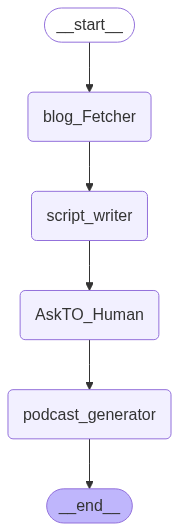

In [74]:
def blog_Fetcher(state:BlogAgentState)->BlogAgentState:
    blog_url=state.get("blog_url",'')
    blog=Blog_scrap_tool(url=blog_url)
    return {"blog":blog}

def summarize_script_writer(state:BlogAgentState)->BlogAgentState:
    blog=state.get("blog","")
    response=chainofsumm_blog.invoke({"blog_post":blog})
    return {"script":response}
def AskTO_Human(state:BlogAgentState)->BlogAgentState:
    voice_ids=[
    'acCWxmzPBgXdHwA63uzP',#female voice
    'ZF6FPAbjXT4488VcRRnw',#female voice
    'y1adqrqs4jNaANXsIZnD',#male voice
    'JBFqnCBsd6RMkjVDRZzb'#male voice
    ]

    user_input=input("Choose a voice:\n available voices are ..\n 1 - Aanya \n 2 - Kiara \n 3 - Arjun\n 4 - Rohan   ")
    # Assign a default voice_id
    voice_id = "JBFqnCBsd6RMkjVDRZzb" # Default to Arjun

    if user_input=="Rohan":
        voice_id="y1adqrqs4jNaANXsIZnD"
    elif user_input=="Arjun":
        voice_id="JBFqnCBsd6RMkjVDRZzb"
    elif user_input=="Aanya":
        voice_id="ZF6FPAbjXT4488VcRRnw"
    elif user_input=="Kiara":
        voice_id="acCWxmzPBgXdHwA63uzP"

    return {"voice_id":voice_id}

def podcast_generator(state:BlogAgentState):
    voice_id=state.get("voice_id","")
    output_path=state.get("output_path","")
    script_text=state.get("script",'')
    text_to_speech(script_text, output_path,voice=voice_id)


workflow=StateGraph(BlogAgentState)

workflow.add_node("blog_Fetcher",blog_Fetcher)
workflow.add_node("script_writer",summarize_script_writer)
workflow.add_node("AskTO_Human",AskTO_Human)
workflow.add_node("podcast_generator",podcast_generator)

workflow.add_edge(START,"blog_Fetcher")
workflow.add_edge("blog_Fetcher","script_writer")
workflow.add_edge("script_writer","AskTO_Human")
workflow.add_edge("AskTO_Human","podcast_generator")
workflow.add_edge("podcast_generator",END)

app=workflow.compile()

app

In [75]:
output_path = f"audio_generations/podcast_{uuid4()}.mp3"
blog_url="https://www.uipath.com/blog/ai/microsoft-build-2025-uipath-insights"
for event in app.stream({"blog_url":blog_url,"output_path":output_path},stream_mode="value"):
  print(event)


Audio saved at: audio_generations/podcast_09253561-b393-4a74-a008-0eb6eeae731b.mp3


In [76]:
from IPython.display import Audio
Audio(output_path)